# Classification Algorithms
This notebook will demonstrate use and accuracy of the classification algorithms as implementeed in this repo. These algorithms include KNN, CART, Random Forest, Perceptron, Multilayer Perceptron, Gradient Boosting, and Logistic Regression.

In [44]:
# Fix project root
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
# Import dependencies and algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from ml_algs.supervised.classification.c_knn import KNN_Class
from ml_algs.supervised.classification.reg_log import Log_Reg
from ml_algs.supervised.classification.cart import Cart
from ml_algs.supervised.classification.random_forest import RandomForest
from ml_algs.supervised.classification.gradient_boosting import GradientBoosting
from ml_algs.supervised.classification.perceptron import Perceptron
from ml_algs.supervised.classification.multilayer_perceptron import MLP
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load iris dataset
data = load_iris()
X = data.data[data.target != 2]
y = data.target[data.target != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Now, all of the necessary packages have been imported, as well as the dataset I am going to use for analysis. This dataset is the "Iris" dataset. This is a classic dataset containing 150 flower samples. For each sample, feature data includes sepal length, sepal width, petal length, and petal width. The target data is the species label, of which there are three (50 obs. Setosa, 50 obs. Versicolor, 50 obs. Virginica). This is an excellent dataset with which to demonstrate classification algorithms. I will display a small sample of the dataset to make sure we know what we're working with.

In [45]:
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = y
species_map = {0: 'setosa', 1: 'versicolor'}
df['Species'] = df['Species'].map(species_map)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


This data looks quite workable, and the three species can be read as classes 0, 1, and 2. The only issue with this is that many of my classification algorithms are binary classifiers, which only work with two classes, not three. To rectify this, I have removed one of the species from the dataset. When testing the algorithms that accept more classes, I will add these samples back. Let's see how the binary classifiers perform on this dataset.

In [46]:
def evaluate(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} accuracy: {acc:.4f}")
    print("True labels:     ", y_test[:15], "...")
    print("Predicted labels:", preds[:15], "...")

evaluate(Perceptron(lr=0.1, epochs=1000), "Perceptron")
evaluate(MLP(n_hidden=8, lr=0.05, epochs=5000), "Multilayer Perceptron")
evaluate(Log_Reg(lr=0.1, epochs=1000), "Logistic Regression")
evaluate(GradientBoosting(n_estimators=20, learning_rate=0.1, max_depth=3), "Gradient Boosting")

Perceptron accuracy: 1.0000
True labels:      [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Predicted labels: [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Multilayer Perceptron accuracy: 1.0000
True labels:      [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Predicted labels: [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Logistic Regression accuracy: 1.0000
True labels:      [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Predicted labels: [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Gradient Boosting accuracy: 1.0000
True labels:      [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...
Predicted labels: [0 0 0 0 0 1 1 0 0 1 1 1 0 1 1] ...


All three binary classification models have predicted the classifications in the test data with 100% accuracy. It is worth noting that, as a more complex model, Multilayer Perceptron is a somewhat clunky choice for such a small dataset. It was just as accurate as the others despite taking much longer to run. I would probably reserve it for places where the other two don't quite do the trick. Now that we've had a look at the binary classifiers, I will return the dataset to its original state and analyze those that support more than two classes.

In [47]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
knn = KNN_Class(k=5)
cart = Cart(max_depth=5, min_samples_split=2)
rf = RandomForest(n_estimators=20, max_depth=5, min_samples_split=2, max_features=None, bootstrap=True)
evaluate(knn, "KNN (k=5)")
evaluate(cart, "CART")
evaluate(rf, "Random Forest")

KNN (k=5) accuracy: 0.9333
True labels:      [1 0 2 2 0 0 2 1 2 0 0 1 2 1 2] ...
Predicted labels: [1 0 2 2 0 0 2 2 2 0 0 2 2 1 2] ...
CART accuracy: 0.8333
True labels:      [1 0 2 2 0 0 2 1 2 0 0 1 2 1 2] ...
Predicted labels: [1 0 2 2 0 0 2 2 1 0 0 2 2 1 2] ...
Random Forest accuracy: 0.9000
True labels:      [1 0 2 2 0 0 2 1 2 0 0 1 2 1 2] ...
Predicted labels: [1 0 2 2 0 0 2 2 1 0 0 2 2 1 2] ...


Though the accuracy was not perfect, these models are working as intended. The species removed from the dataset for the binary models (virginica, in data as 2) has some overlap with the versicolor species (1). Further analysis shows that this is the exclusive source of model failure and all setosa (0) flowers have been correctly labeled, and no flowers have been incorrectly labeled as setosa. Additionally, KNN and Random Forest outperforming CART is expected.

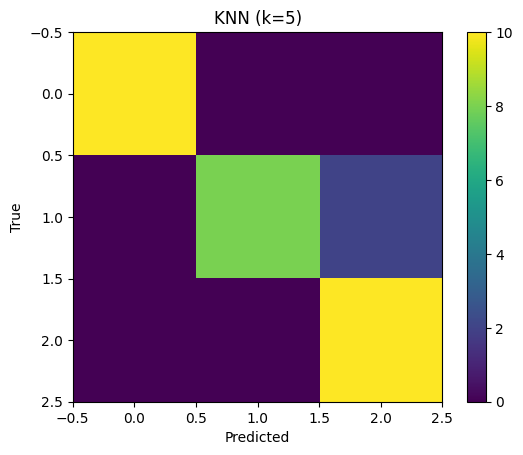

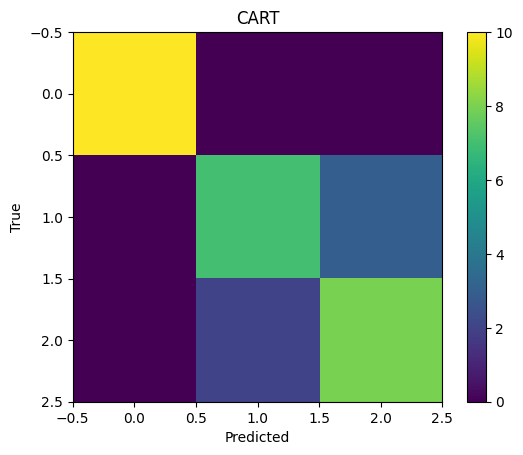

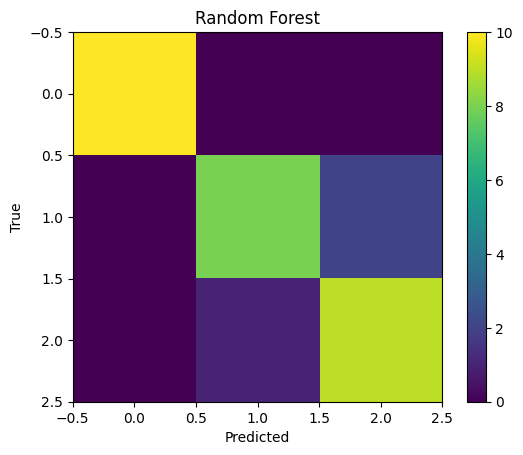

In [48]:
def plot_confusion(model, name):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.imshow(cm)
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.colorbar()
    plt.show()

plot_confusion(knn, "KNN (k=5)")
plot_confusion(cart, "CART")
plot_confusion(rf, "Random Forest")

The above confusion plots show where the model went wrong. The diagonal from top-left to bottom-right shows the correct predictions. Any color other than the darkest purple on any space other than that diagonal represents incorrect predictions. Interestingly, when KNN confused classes 1 and 2, it incorrectly labeled a flower as species 2 when it was truly species 1, but never the other way around. As mentioned previously, every model has the darkest shade of purple on the first row and column outside of the correct prediction spot, as the models had no confusion about species 0.

Analysis aside, these results demonstrate that all seven classification algorithms in this repo are successful at prediction. These algorithms were:
- Perceptron
- Multilayer Perceptron
- Logistic Regression
- Gradient Boosting
- KNN
- CART
- Random Forest